# Interpolation & Fitting

## 1. Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from matplotlib.cm import colors
from scipy.interpolate import interp1d, lagrange
from scipy.optimize import curve_fit
from statsmodels.nonparametric.kernel_regression import KernelReg

## 2. Calculations

### 2.1 Original data

In [2]:
# Original data points
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([0.1, 1.2, 3.0, 4.2, 3.8])

# Extra data points for drawing the curves
x1 = np.linspace(-0.9, 6.7, 50)
x2 = np.linspace(x.min(), x.max(), 50)

### 2.2 Calculate interpolating functions

In [3]:
lg = lagrange(x, y)
linear = interp1d(x, y, kind='linear')
spline0 = interp1d(x, y, kind='zero')
spline1 = interp1d(x, y, kind='slinear')
spline2 = interp1d(x, y, kind='quadratic')
spline3 = interp1d(x, y, kind='cubic')

## 3. Plots - Lagrange vs Splines

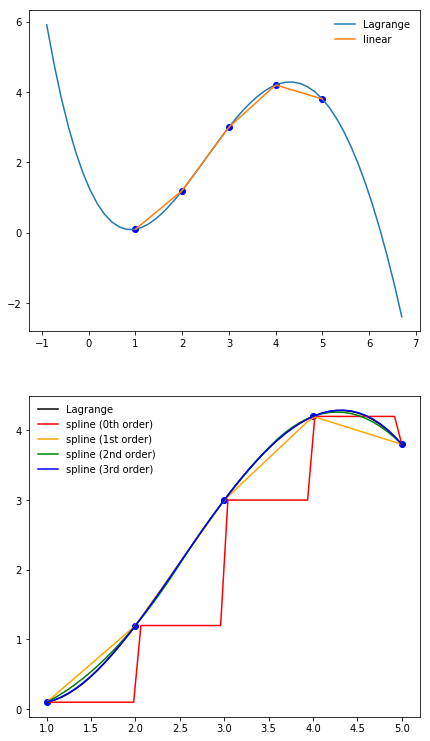

In [4]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(7,13))
ax0.plot(x, y, 'bo')
ax0.plot(x1, lg(x1), label='Lagrange')
ax0.plot(x2, linear(x2), label='linear')
ax0.legend(loc='best', frameon=False)

ax1.plot(x, y, 'bo')
ax1.plot(x2, lg(x2), label='Lagrange', color='black')
ax1.plot(x2, spline0(x2), label='spline (0th order)', color='red')
ax1.plot(x2, spline1(x2), label='spline (1st order)', color='orange')
ax1.plot(x2, spline2(x2), label='spline (2nd order)', color='green')
ax1.plot(x2, spline3(x2), label='spline (3rd order)', color='blue')
ax1.legend(loc='best', frameon=False);

## 4. Comparison - Lagrange, LOWESS, Kernel, Cubic Splines

### 4.1 Function to fit the data

In [5]:
def get_interpolated_data(x_train, y_train, x_new, kind, frac=0.1):
    if kind == 'lagrange':
        fn = lagrange(x_train, y_train)
        x_pred = x_new
        y_pred = fn(x_new)
    elif kind == 'lowess':
        xy = sm.nonparametric.lowess(y_train, x_train, frac=frac)
        x_pred = xy[:, 0]
        y_pred = xy[:, 1]
    elif kind == 'kernel':
        kr = KernelReg(y_train, x_train, 'c')
        x_pred = x_new
        y_pred, _ = kr.fit(x_new)
    else:
        fn = interp1d(x, y, kind=kind)
        x_pred = x_new
        y_pred = fn(x_new)
        
    return x_pred, y_pred

### 4.2 Data

In [6]:
n_pts = 10
n_all = 50

x = np.linspace(0, 2*np.pi, n_pts)
y = np.sin(x) + 0.1*(np.random.uniform(0, 1, n_pts) - 0.5)

x_actual = np.linspace(0, 2*np.pi, n_all)
y_actual = np.sin(x_actual)

x2 = np.linspace(x.min(), x.max(), 50)

### 4.3 Plots

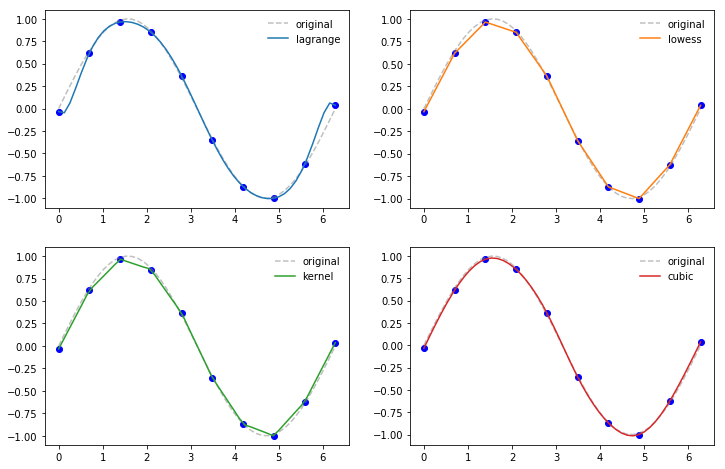

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
kinds = ['lagrange', 'lowess', 'kernel', 'cubic']
cmap = plt.get_cmap("tab10")

i = 0
for row in range(2):
    for col in range(2):
        kind = kinds[i]
        x_p, y_p = get_interpolated_data(x, y, x2, kind)
        axs[row][col].plot(x, y, 'bo')
        axs[row][col].plot(x_actual, y_actual, '--', color='gray', alpha=0.5, label='original')
        axs[row][col].plot(x_p, y_p, label=kind, color=cmap(i))
        axs[row][col].legend(loc='best', frameon=False)
        i += 1